In [6]:
#KNN: Simple training of the algo: just store the data
#Prediction: calculate distance from x(new data point you choose) to all points in the data
#            sort points by íncreasing distance from x
#            Predict the majority label of the 'k' closest points

#Pros: Very simple, no data training at all, works with any number of classes, easy to update data, just two parameters(K, and Distance Metric(Distance between test point and old training points))

#Cons: Worse for large datasets (High prediction cost), not good with data with a lot of features. 

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('Classified data', index_col=0)

In [12]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [14]:
#standardization: to make sure all the data is processed on equal footing
from sklearn.preprocessing import StandardScaler

In [16]:
#create an instance of it
scaler = StandardScaler()

In [20]:
#fit the data to the scaler, make sure to drop your ta´rget class or cloumn, basically the column you're trying to predict
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [26]:
#transform the data into features
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1)) #all the data is bascially translated into a langauge for knn to understand it properly

In [28]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [34]:
#create my features Dataframe from my scaled features
df_features = pd.DataFrame(scaled_features, columns=df.columns[:-1])# -1 to take out the Target Class which I dropped

In [36]:
df_features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [40]:
df_features.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [42]:
#train model
from sklearn.model_selection import train_test_split

In [44]:
y = df['TARGET CLASS']
y

0      1
1      0
2      0
3      1
4      1
      ..
995    1
996    0
997    1
998    1
999    1
Name: TARGET CLASS, Length: 1000, dtype: int64

In [46]:
X = df_features
y = df['TARGET CLASS'] #directly from df because i dropped it when making the df_features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [48]:
##KNN
from sklearn.neighbors import KNeighborsClassifier

In [52]:
#create an instance
#starting a k=1, we'll set the number of neighbors to 1
knn = KNeighborsClassifier(n_neighbors=1)

In [54]:
#fit out training data to the instance
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [56]:
#create predictions based on our test data
predictions = knn.predict(X_test)

In [58]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1], dtype=int64)

In [60]:
#checking metrcis
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[99  7]
 [ 9 85]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       106
           1       0.92      0.90      0.91        94

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200



In [66]:
#improving the model using the elbow method
error_rate = [] #list to store my error rates depending on the number k starts from

#basically recreating the model using diff values for k to check which is the best and most accurate
for i in range(1, 40):
    
    knn = KNeighborsClassifier(n_neighbors=i) #instance of knc 
    knn.fit(X_train, y_train) #fir the model with the train data

    predictions_i = knn.predict(X_test) # creating predictions for each k variable 

    error_rate.append(np.mean(predictions_i != y_test)) # basically the wrong predictions. y_test contains the right ones, any prediction that is wrong compared to y_test is an error. so the mean is the average error rate

Text(0, 0.5, 'Error Rate')

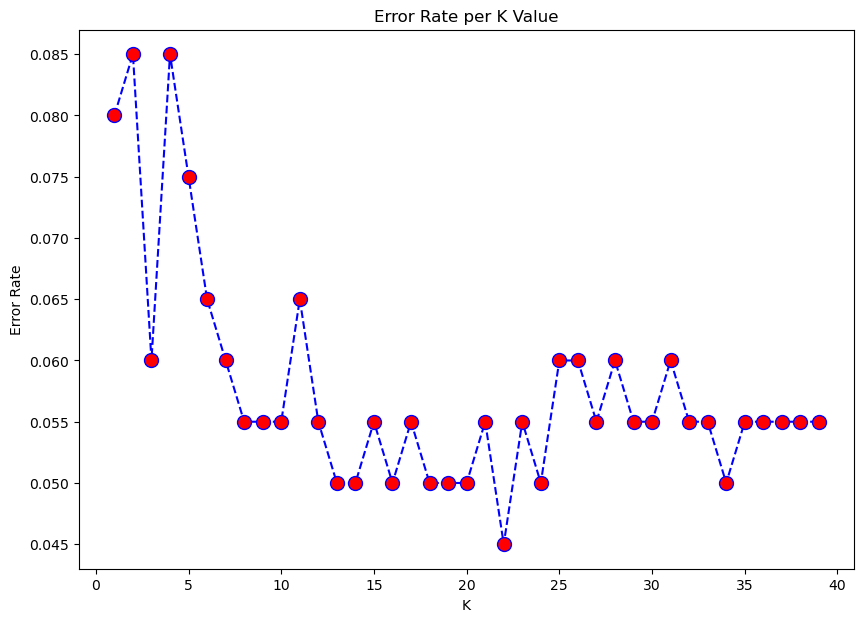

In [68]:
plt.figure(figsize=(10,7))
plt.plot(range(1,40), error_rate, color='blue',linestyle='dashed', marker='o', markerfacecolor='red', markersize=10) #range is 1 to 40, refer to for loop.
plt.title('Error Rate per K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [72]:
#test diff k values
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[102   4]
 [  5  89]]


              precision    recall  f1-score   support

           0       0.95      0.96      0.96       106
           1       0.96      0.95      0.95        94

    accuracy                           0.95       200
   macro avg       0.96      0.95      0.95       200
weighted avg       0.96      0.95      0.95       200

